# import basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

palette = sns.color_palette("Set1")  # Example palette from Seaborn
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("heart_disease.csv")

# initial Data Exploration

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,atypical angina,140.0,289,No,normal,172.0,No,0.0,upsloping,0
1,49,female,non-anginal pain,160.0,180,No,normal,156.0,No,1.0,flat,1
2,37,male,atypical angina,130.0,283,No,having ST-T wave abnormality,98.0,No,0.0,upsloping,0
3,48,female,asymptomatic,138.0,214,No,normal,108.0,yes,1.5,flat,1
4,54,male,non-anginal pain,150.0,195,No,normal,122.0,No,0.0,upsloping,0


In [4]:
df.shape

(1190, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   object 
 2   chest pain type      1190 non-null   object 
 3   resting bp s         1170 non-null   float64
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   object 
 6   resting ecg          1190 non-null   object 
 7   max heart rate       1184 non-null   float64
 8   exercise angina      1190 non-null   object 
 9   oldpeak              1190 non-null   float64
 10  ST slope             1189 non-null   object 
 11  target               1190 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 111.7+ KB


In [6]:
df.describe()

,age,resting bp s,cholesterol,max heart rate,oldpeak,target
count,1190.000000,1170.000000,1190.000000,1184.000000,1190.000000,1190.000000
mean,53.720168,132.162393,208.228571,139.918919,0.922773,0.528571
std,9.358203,18.391967,103.736808,25.447478,1.086337,0.499393
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,186.000000,121.750000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,141.000000,0.600000,1.000000
75%,60.000000,140.000000,269.750000,160.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


In [7]:
df.isnull().sum()

age                     0
sex                     0
chest pain type         0
resting bp s           20
cholesterol             0
fasting blood sugar     0
resting ecg             0
max heart rate          6
exercise angina         0
oldpeak                 0
ST slope                1
target                  0
dtype: int64

In [8]:
df.describe(include='object')

,sex,chest pain type,fasting blood sugar,resting ecg,exercise angina,ST slope
count,1190,1190,1190,1190,1190,1189
unique,2,4,2,3,2,3
top,male,asymptomatic,No,normal,No,flat
freq,909,625,936,684,729,582


In [9]:
df.duplicated().sum()

262

In [10]:
df.loc[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
831,29,male,atypical angina,130.0,204,No,Showing possible hypertrophy,202.0,No,0.0,upsloping,0
1019,29,male,atypical angina,130.0,204,No,Showing possible hypertrophy,202.0,No,0.0,upsloping,0
755,34,female,atypical angina,118.0,210,No,normal,192.0,No,0.7,upsloping,0
1112,34,female,atypical angina,118.0,210,No,normal,192.0,No,0.7,upsloping,0
791,34,male,typical angina,118.0,182,No,Showing possible hypertrophy,174.0,No,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1120,74,female,atypical angina,120.0,269,No,Showing possible hypertrophy,121.0,yes,0.2,upsloping,0
690,76,female,non-anginal pain,140.0,197,No,having ST-T wave abnormality,116.0,No,1.1,flat,0
1144,76,female,non-anginal pain,140.0,197,No,having ST-T wave abnormality,116.0,No,1.1,flat,0
816,77,male,asymptomatic,125.0,304,No,Showing possible hypertrophy,162.0,yes,0.0,upsloping,1


In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,atypical angina,140.0,289,No,normal,172.0,No,0.0,upsloping,0
1,49,female,non-anginal pain,160.0,180,No,normal,156.0,No,1.0,flat,1
2,37,male,atypical angina,130.0,283,No,having ST-T wave abnormality,98.0,No,0.0,upsloping,0
3,48,female,asymptomatic,138.0,214,No,normal,108.0,yes,1.5,flat,1
4,54,male,non-anginal pain,150.0,195,No,normal,122.0,No,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,typical angina,110.0,264,No,normal,132.0,No,1.2,flat,1
1186,68,male,asymptomatic,144.0,193,yes,normal,141.0,No,3.4,flat,1
1187,57,male,asymptomatic,130.0,131,No,normal,115.0,yes,1.2,flat,1
1188,57,female,atypical angina,130.0,236,No,Showing possible hypertrophy,174.0,No,0.0,flat,1


In [14]:
# split columns to numerical and categorical
numerical_features=[]
categorical_features=[]
col=list(df.columns)
for i in col[:-1]:
    if df[i].dtype =='object':
        categorical_features.append(i)
    else:
        numerical_features.append(i)
print('Categorical Features :',categorical_features)
print('Numerical Features :',numerical_features)

Categorical Features : ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
Numerical Features : ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']


In [15]:
# Splitting the data into training and testing sets before EDA to prevent data leakage and ensure unbiased analysis
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42,stratify=df[categorical_features[:3]])

# EDA

## Target

<Axes: xlabel='target', ylabel='count'>

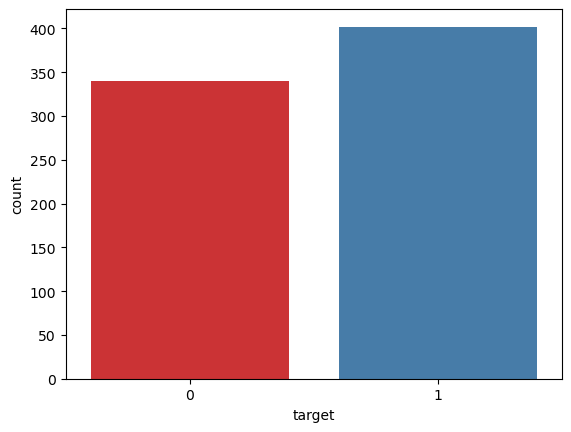

In [16]:
sns.countplot(data=train,x="target")

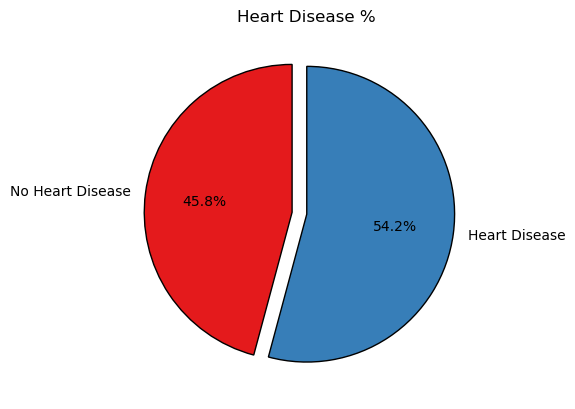

In [17]:
l = list(train['target'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

## Numerical Features

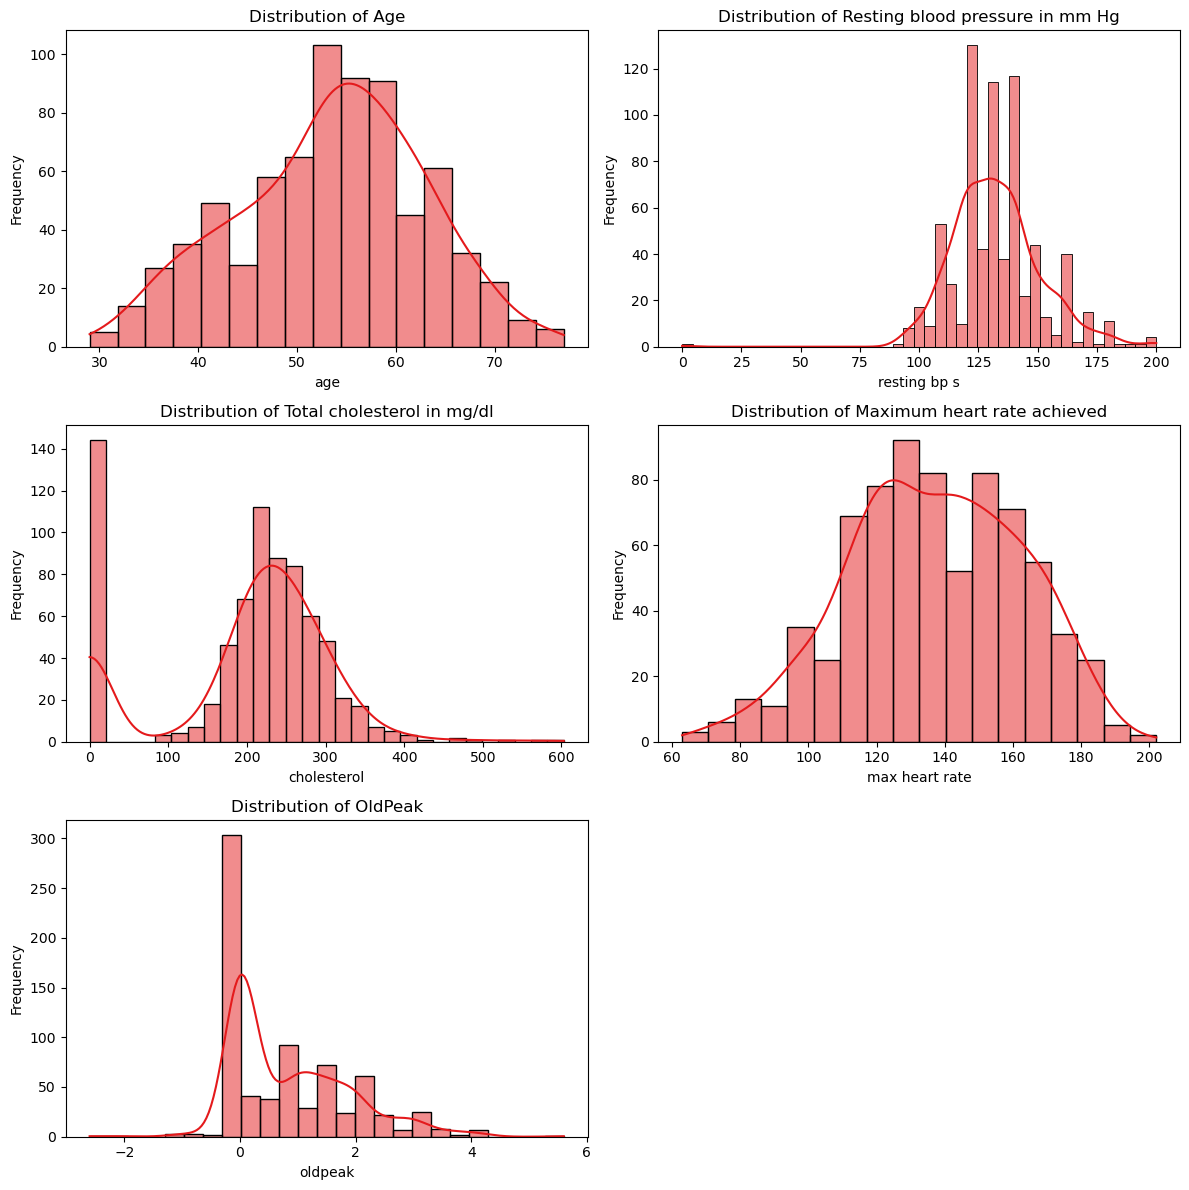

In [18]:
labels = ['Age', 'Resting blood pressure in mm Hg', 'Total cholesterol in mg/dl', 'Maximum heart rate achieved', 'OldPeak']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

axes = axes.flatten()
for i, (column,label) in enumerate(zip(numerical_features,labels)):
    sns.histplot(data=train,x=column,ax=axes[i],kde=True)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency') 
    axes[i].set_title(f'Distribution of {label}') 
axes[-1].axis('off')
plt.tight_layout()

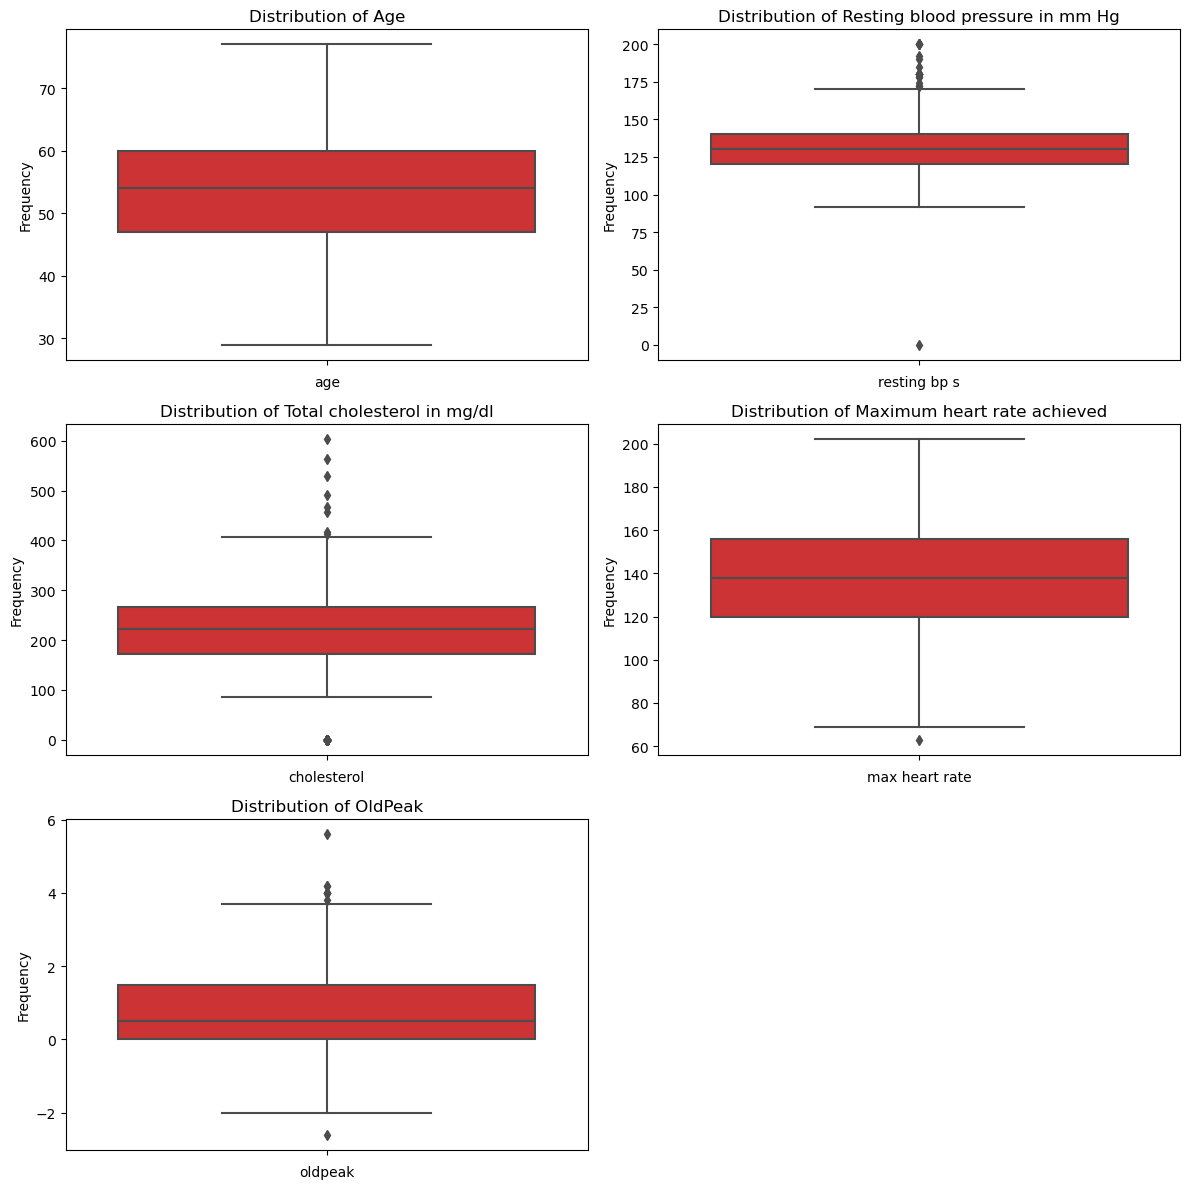

In [19]:
labels = ['Age', 'Resting blood pressure in mm Hg', 'Total cholesterol in mg/dl', 'Maximum heart rate achieved', 'OldPeak']

fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12, 12))

axes = axes.flatten()
for i, (column,label) in enumerate(zip(numerical_features,labels)):
    sns.boxplot(data=train,y=train[column],ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency') 
    axes[i].set_title(f'Distribution of {label}') 
axes[-1].axis('off')
plt.tight_layout()

## Categorical Feateurs

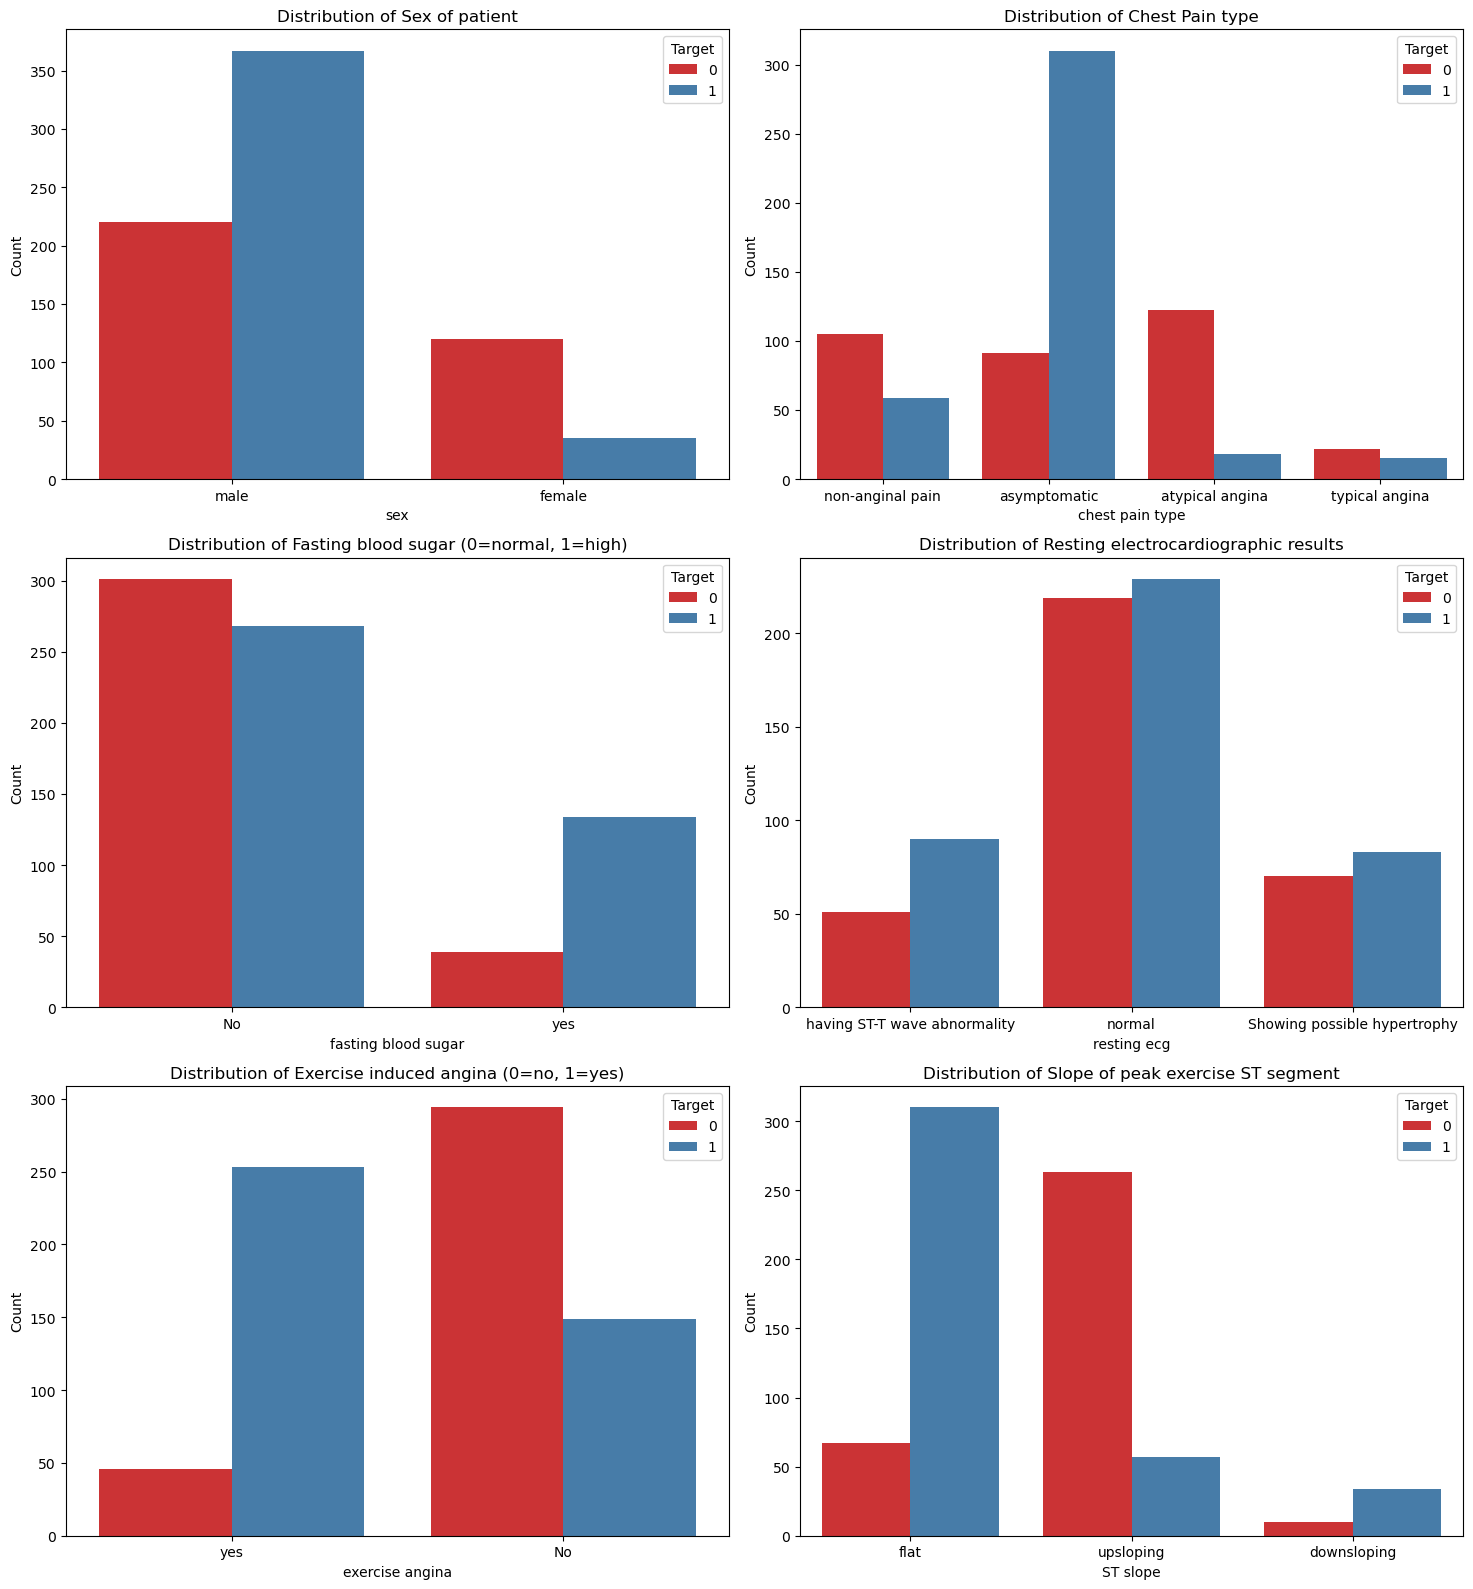

In [20]:
labels = ['Sex of patient','Chest Pain type','Fasting blood sugar (0=normal, 1=high)','Resting electrocardiographic results','Exercise induced angina (0=no, 1=yes)','Slope of peak exercise ST segment']


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 16))

axes = axes.flatten()

for i, (column, label) in enumerate(zip(categorical_features, labels)):
    sns.countplot(data=train, x=column, hue='target', ax=axes[i])
    axes[i].set_xlabel(column)  
    axes[i].set_ylabel('Count') 
    axes[i].legend(title='Target', loc='upper right')  
    axes[i].set_title(f'Distribution of {label}') 
plt.tight_layout()
plt.show()

## Categorical Features vs Positive Heart Disease Cases :

In [21]:
sex = train[train['target'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

chest_type = train[train['target'] == 1]['chest pain type'].value_counts()
chest_type = [chest_type[0] / sum(chest_type) * 100,chest_type[1] / sum(chest_type) * 100,chest_type[2] / sum(chest_type) * 100,chest_type[3] / sum(chest_type) * 100]

fbs = train[train['target'] == 1]['fasting blood sugar'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = train[train['target'] == 1]['resting ecg'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = train[train['target'] == 1]['exercise angina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = train[train['target'] == 1]['ST slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

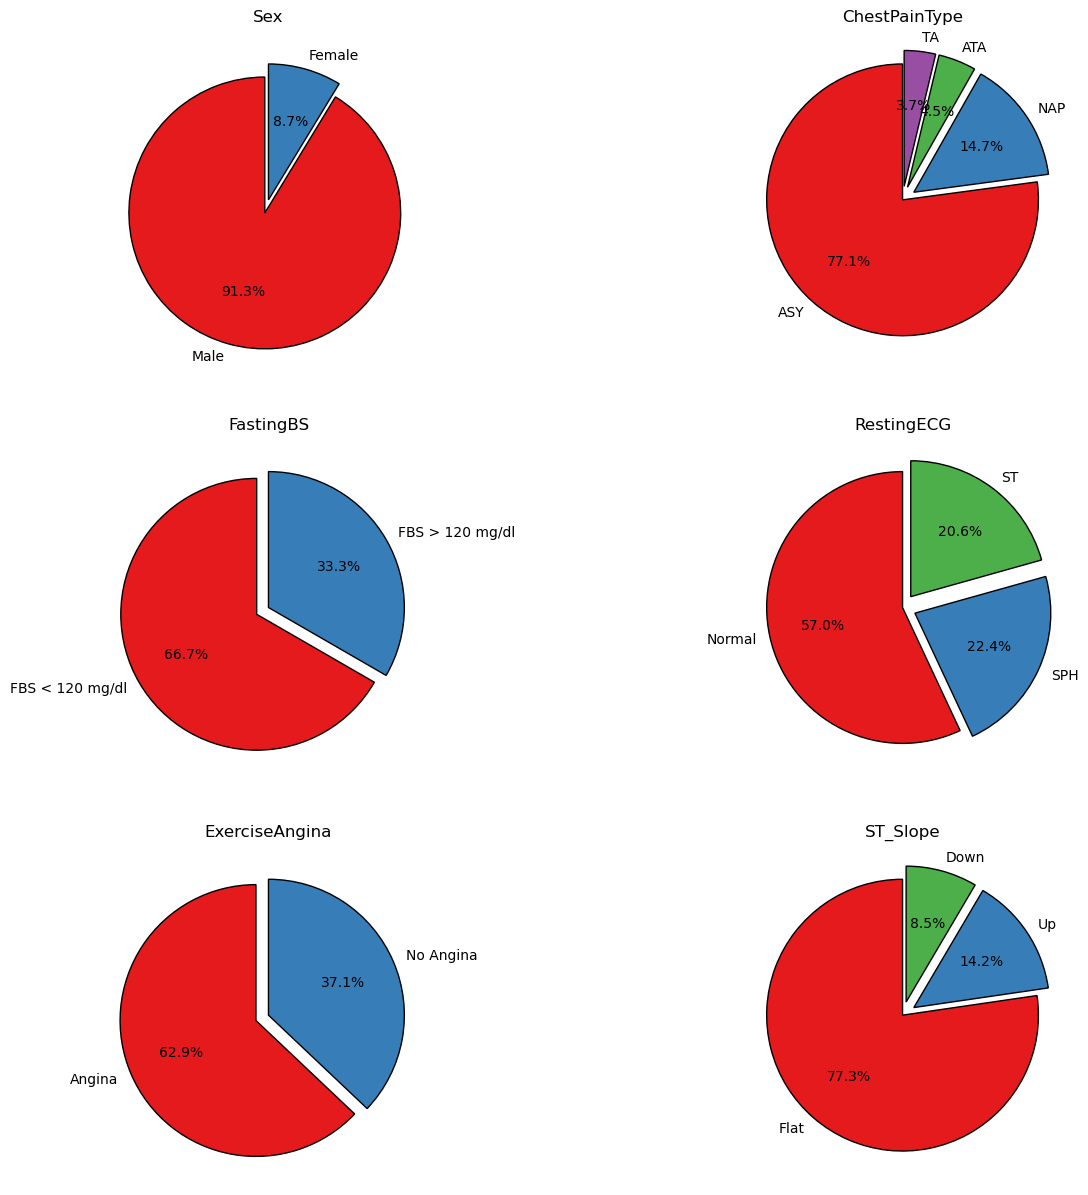

In [22]:
ax,fig = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(chest_type,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','SPH','ST'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

## Numerical Features vs Target Variable (HeartDisease) :

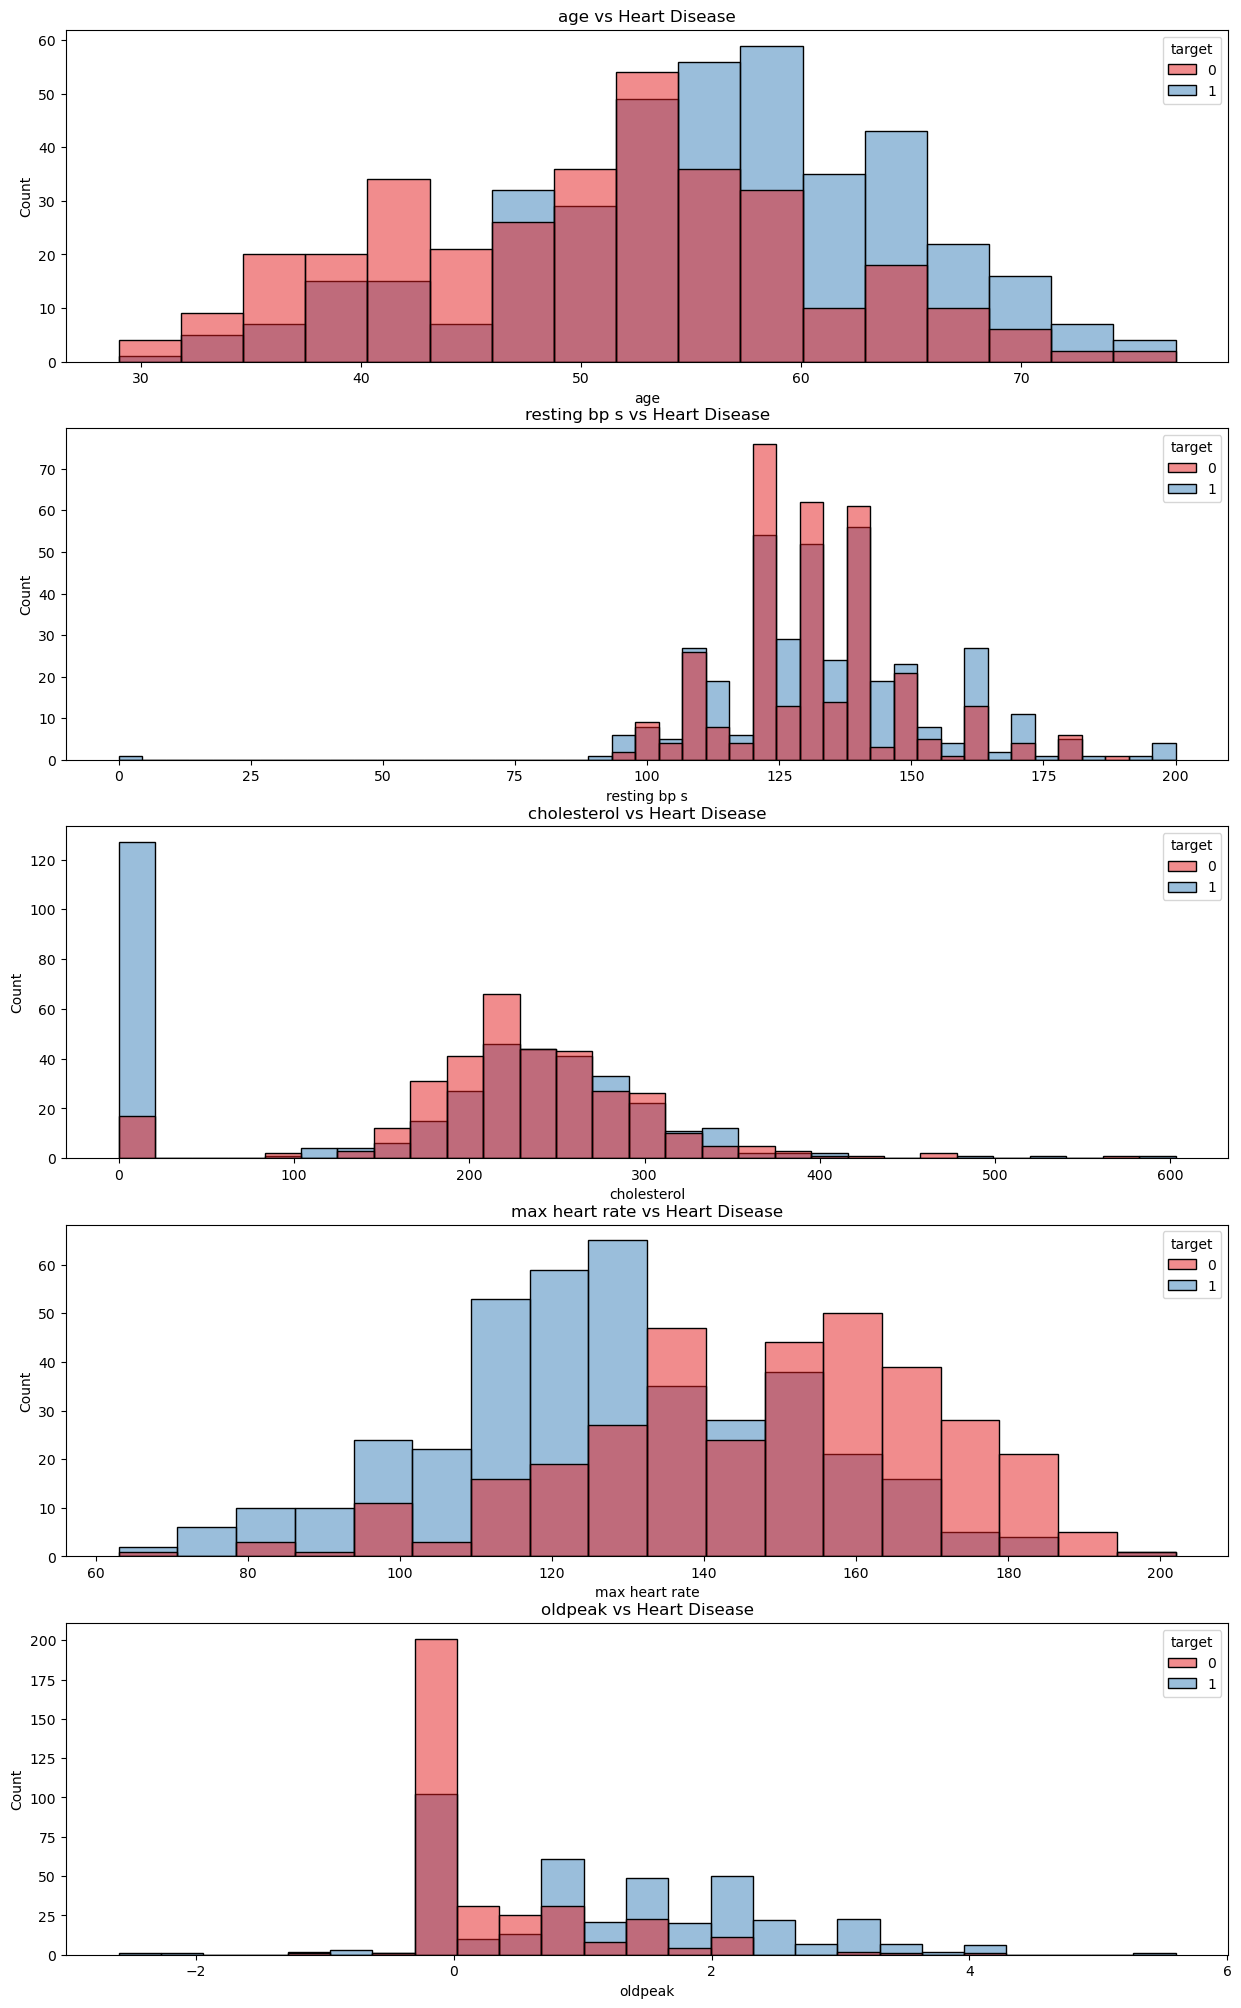

In [23]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,25))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.histplot(data = train,x=numerical_features[i],hue = "target")
    title = numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

## Numerical features vs Categorical features w.r.t Target variable(HeartDisease) :

### sex vs numerical Features

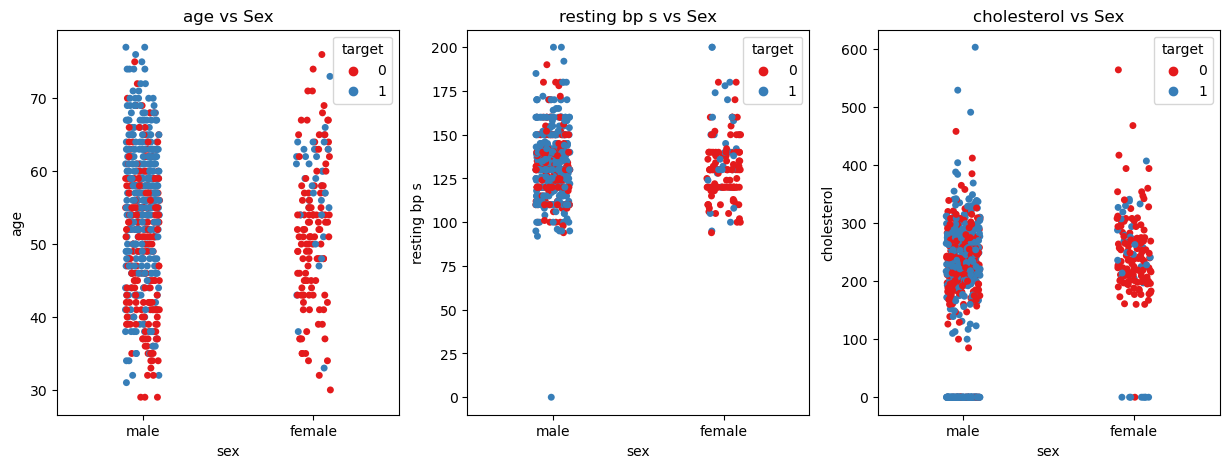

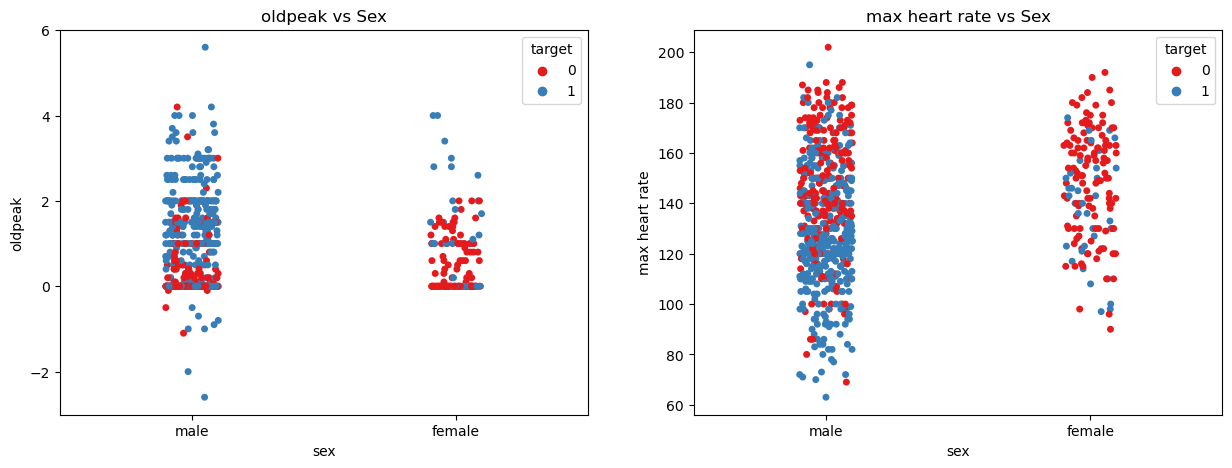

In [24]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'sex',y = numerical_features[i],data = train,hue = 'target')
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'sex',y = numerical_features[i],data = train,hue = 'target');
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

### Chest Pain Type vs Numerical Features :

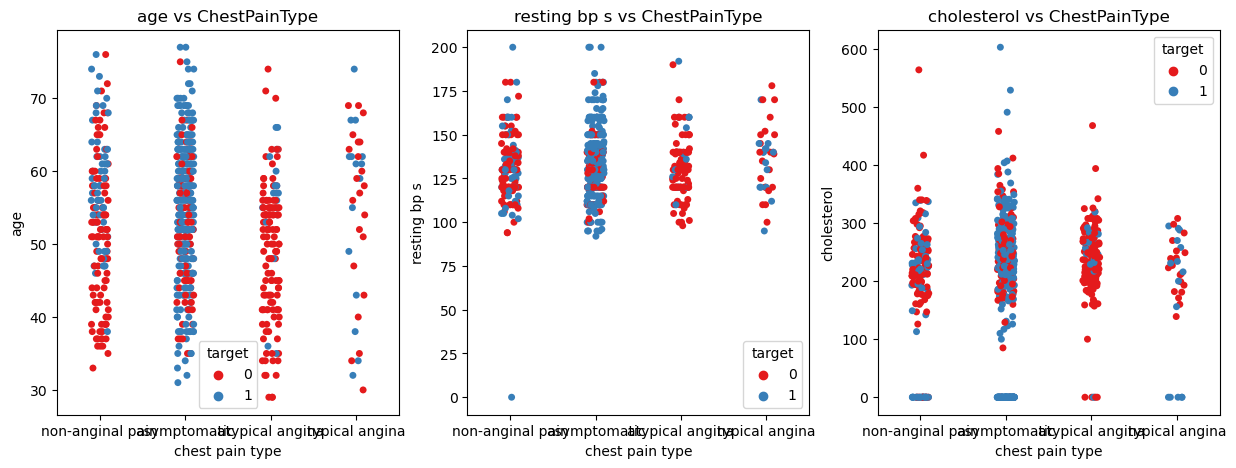

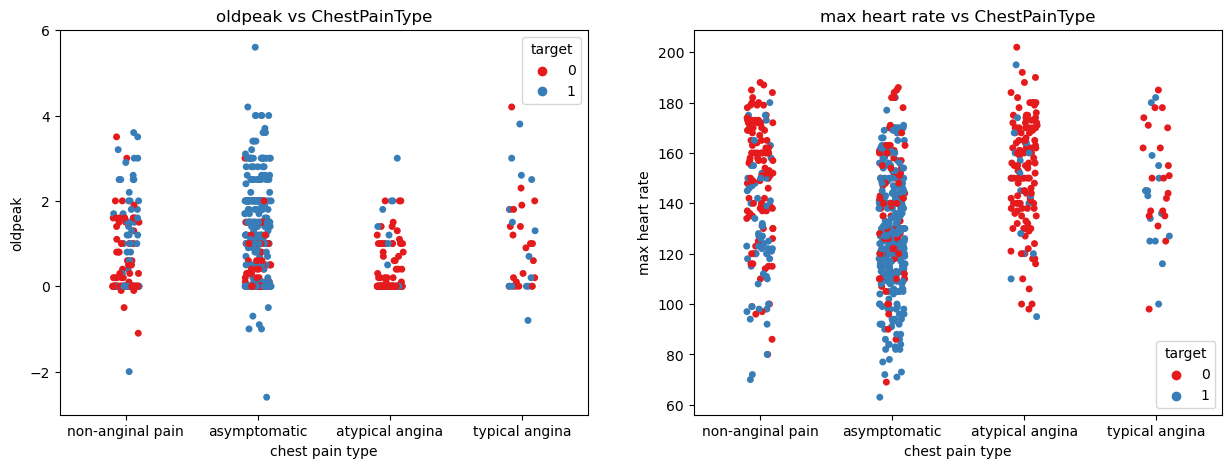

In [25]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'chest pain type',y = numerical_features[i],data = train,hue = 'target');
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'chest pain type',y = numerical_features[i],data = train,hue = 'target');
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title);

### Fasting Blood Suger vs Numerical features :

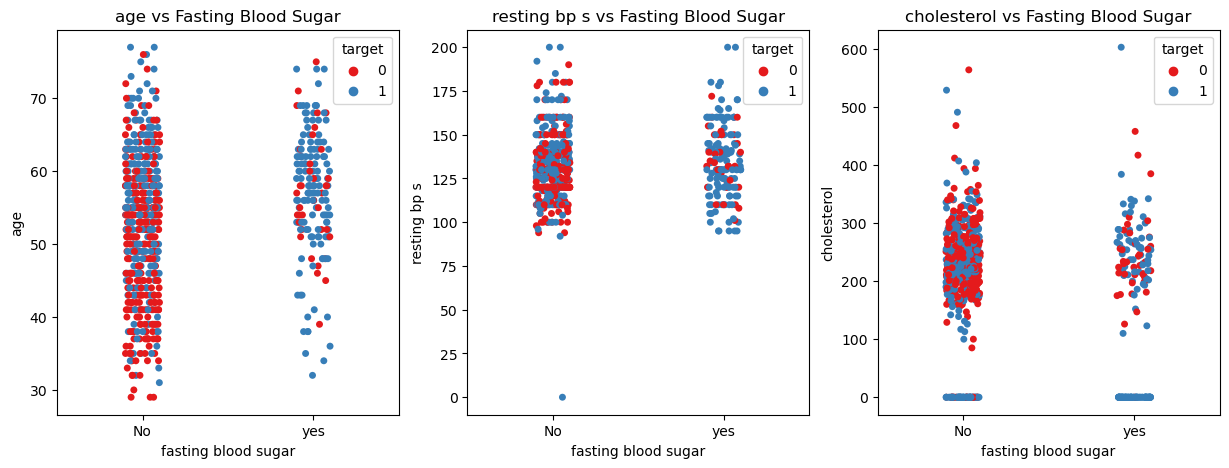

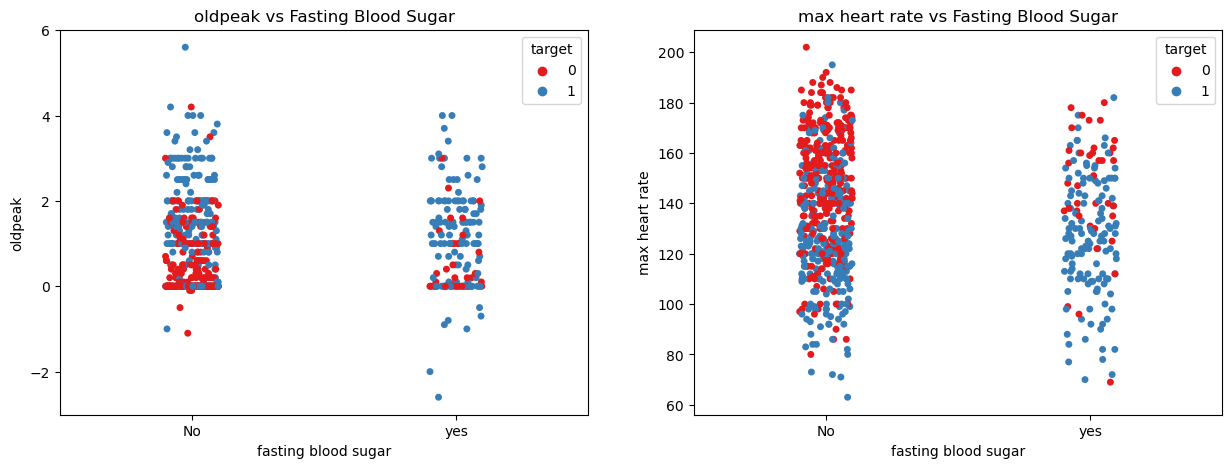

In [26]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'fasting blood sugar',y = numerical_features[i],data = train,hue = 'target');
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'fasting blood sugar',y = numerical_features[i],data = train,hue = 'target');
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

### resting ecg vs Numerical Features :

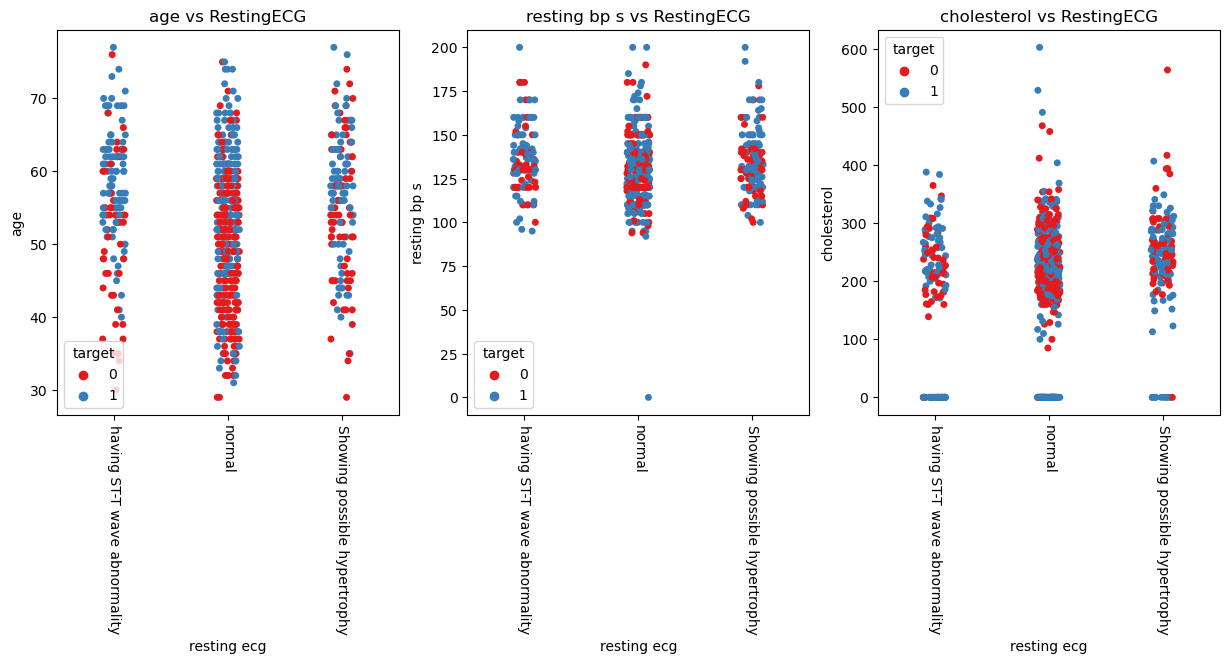

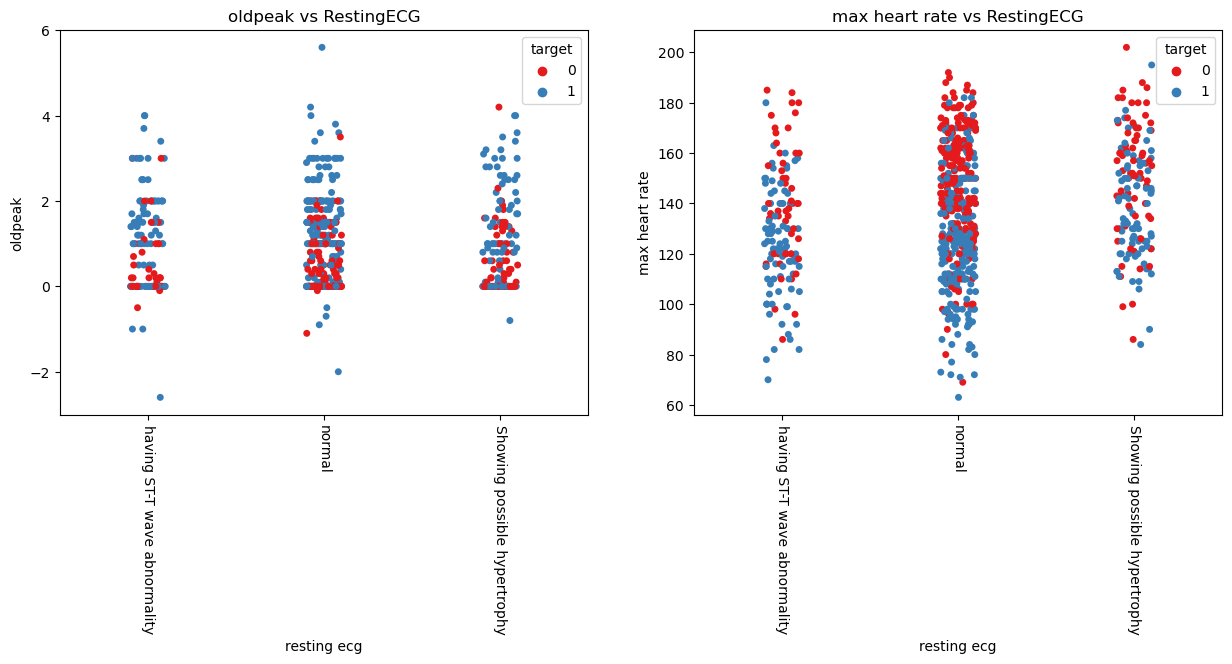

In [27]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'resting ecg',y = numerical_features[i],data = train,hue = 'target')
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title);
    plt.xticks(rotation=-90)

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'resting ecg',y = numerical_features[i],data = train,hue = 'target')
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);
    plt.xticks(rotation=-90)


### Exercise Angina vs Numerical Features :

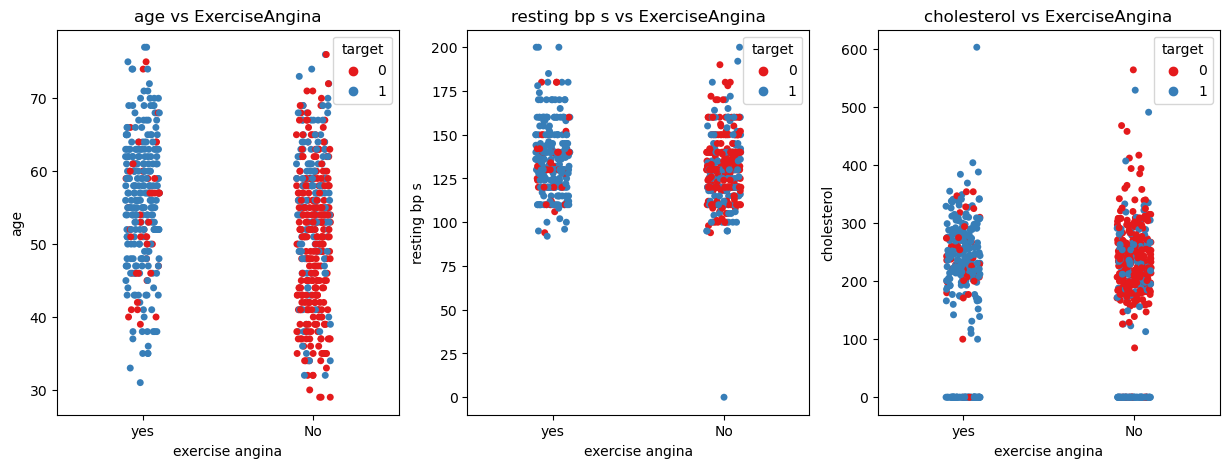

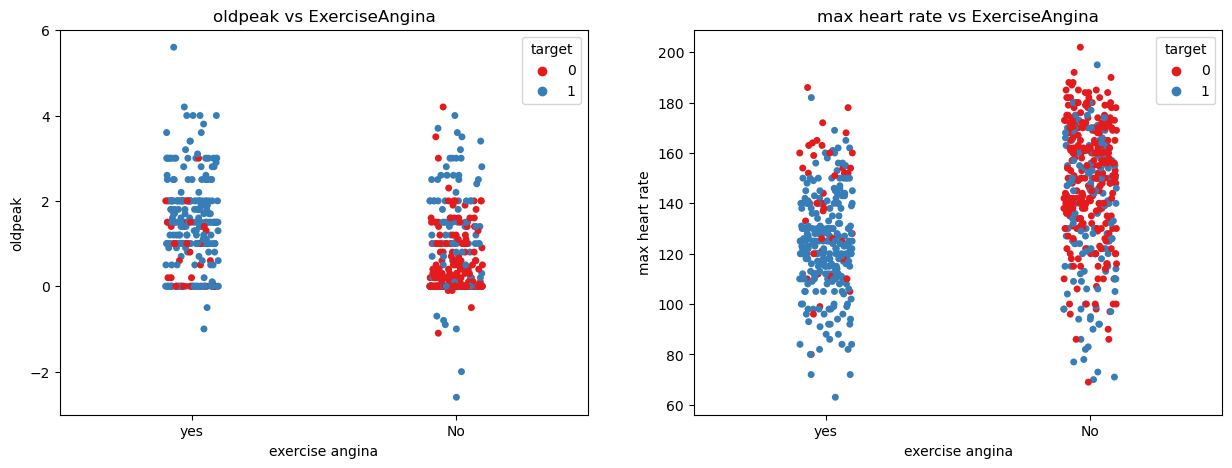

In [28]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'exercise angina',y = numerical_features[i],data = train,hue = 'target')
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'exercise angina',y = numerical_features[i],data = train,hue = 'target');
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

### ST Slope vs Numerical Features :

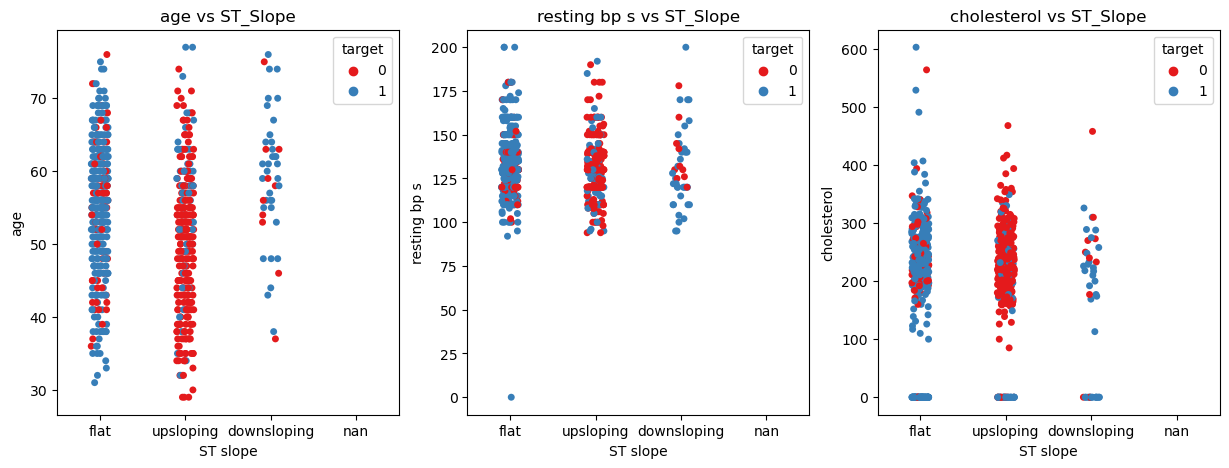

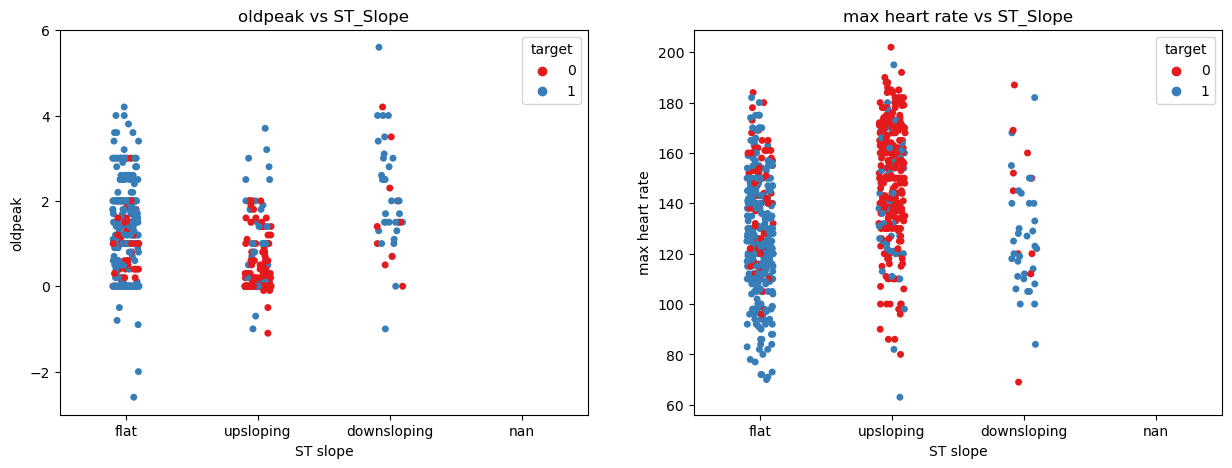

In [29]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST slope',y = numerical_features[i],data = train,hue = 'target');
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST slope',y = numerical_features[i],data = train,hue = 'target');
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title);

##   Correlation Heatmaps

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = train.copy()

df1['sex'] = le.fit_transform(df1['sex'])
df1['chest pain type'] = le.fit_transform(df1['chest pain type'])
df1['resting ecg'] = le.fit_transform(df1['resting ecg'])
df1['exercise angina'] = le.fit_transform(df1['exercise angina'])
df1['ST slope'] = le.fit_transform(df1['ST slope'])
df1['fasting blood sugar'] = le.fit_transform(df1['fasting blood sugar'])

Text(0.5, 1.0, 'Correlation Heatmap')

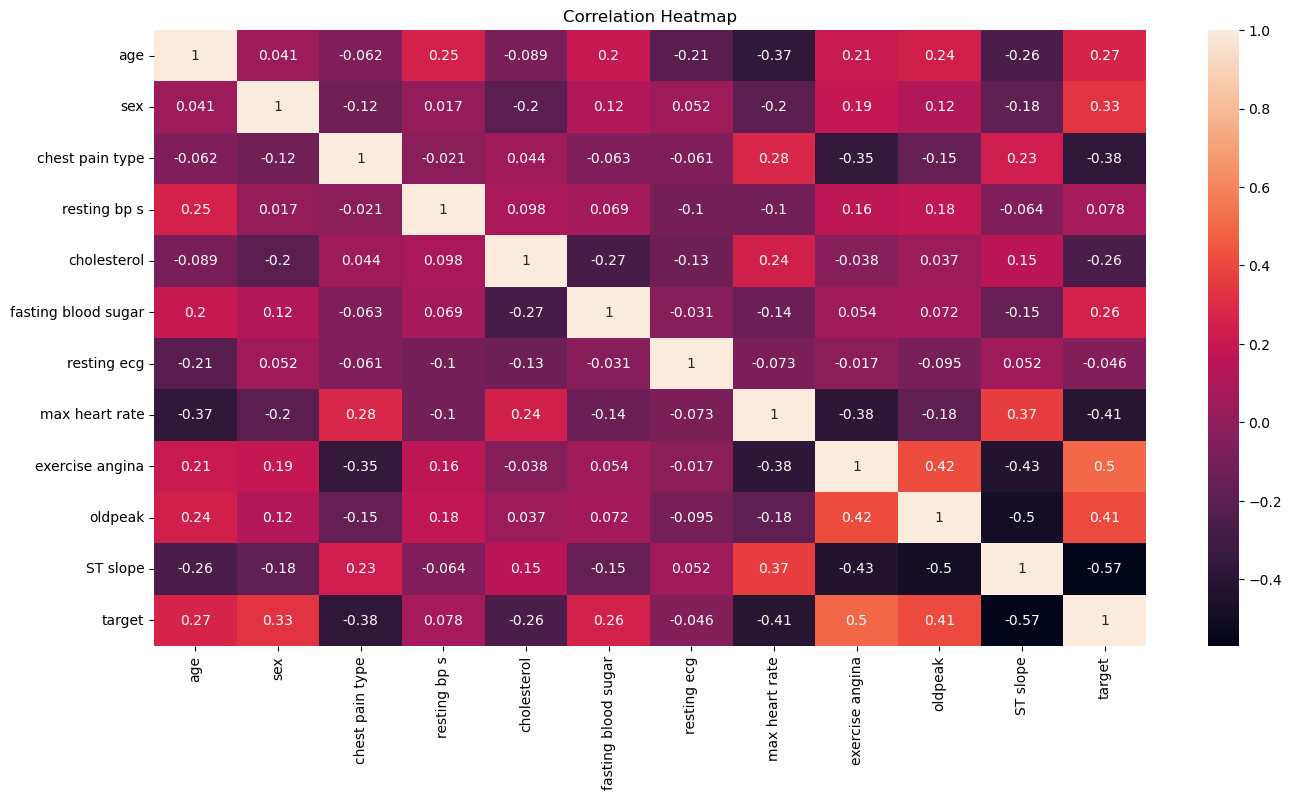

In [31]:
plt.figure(figsize=(16, 8))

corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Heatmap')

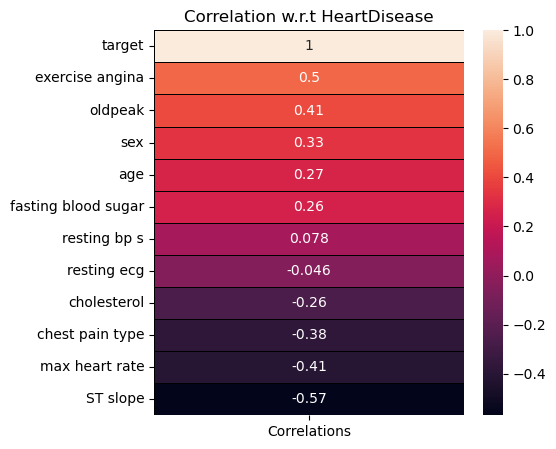

In [32]:
corr = df1.corrwith(df1['target']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

# Data Cleaning and Feature Engineering

In [33]:
# split train and test to x and y
x_train=train.drop("target",axis=1)
y_train=train["target"]
x_test=test.drop("target",axis=1)
y_test=test["target"]


## **zeros values in cholesterol:** 

In [34]:
x_train_cleaned=x_train.copy()

In [35]:
x_train_cleaned["cholesterol"]=x_train_cleaned["cholesterol"].replace(0,np.nan)

<Axes: xlabel='cholesterol', ylabel='Count'>

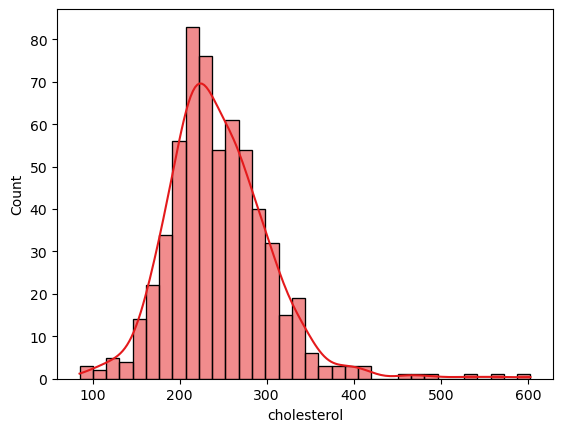

In [36]:
sns.histplot(data=x_train_cleaned,x="cholesterol",kde=True)

In [37]:
# this class we use before but We've encountered a problem when make deploy so we use another technique
from sklearn.base import BaseEstimator, TransformerMixin
class ZerosCholesterolTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X["cholesterol"] = X["cholesterol"].replace(0, np.nan)
        return X
    def set_output(self,transform=None):
        return self

In [38]:
from sklearn.impute import SimpleImputer

zero_imputer = SimpleImputer(missing_values=0,strategy='constant', fill_value=np.nan)

## **Fix null values**


In [39]:
from sklearn.impute import KNNImputer,SimpleImputer
num_impute=KNNImputer(n_neighbors=5)
cat_impute=SimpleImputer(strategy="most_frequent")

## **Fix outliers**


In [40]:
# detect which feature it contains outliers
for feature in numerical_features:
    
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower = q1- 1.5*IQR
    upper = q3 + 1.5*IQR
    
    if x_train[(x_train[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

age no
resting bp s yes
cholesterol yes
max heart rate no
oldpeak yes


In [41]:
for col in numerical_features:
    q1 = x_train_cleaned[col].quantile(0.25)
    q3 = x_train_cleaned[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    x_train_cleaned.loc[x_train_cleaned[col] < low, col] = low
    x_train_cleaned.loc[x_train_cleaned[col] > high, col] = high

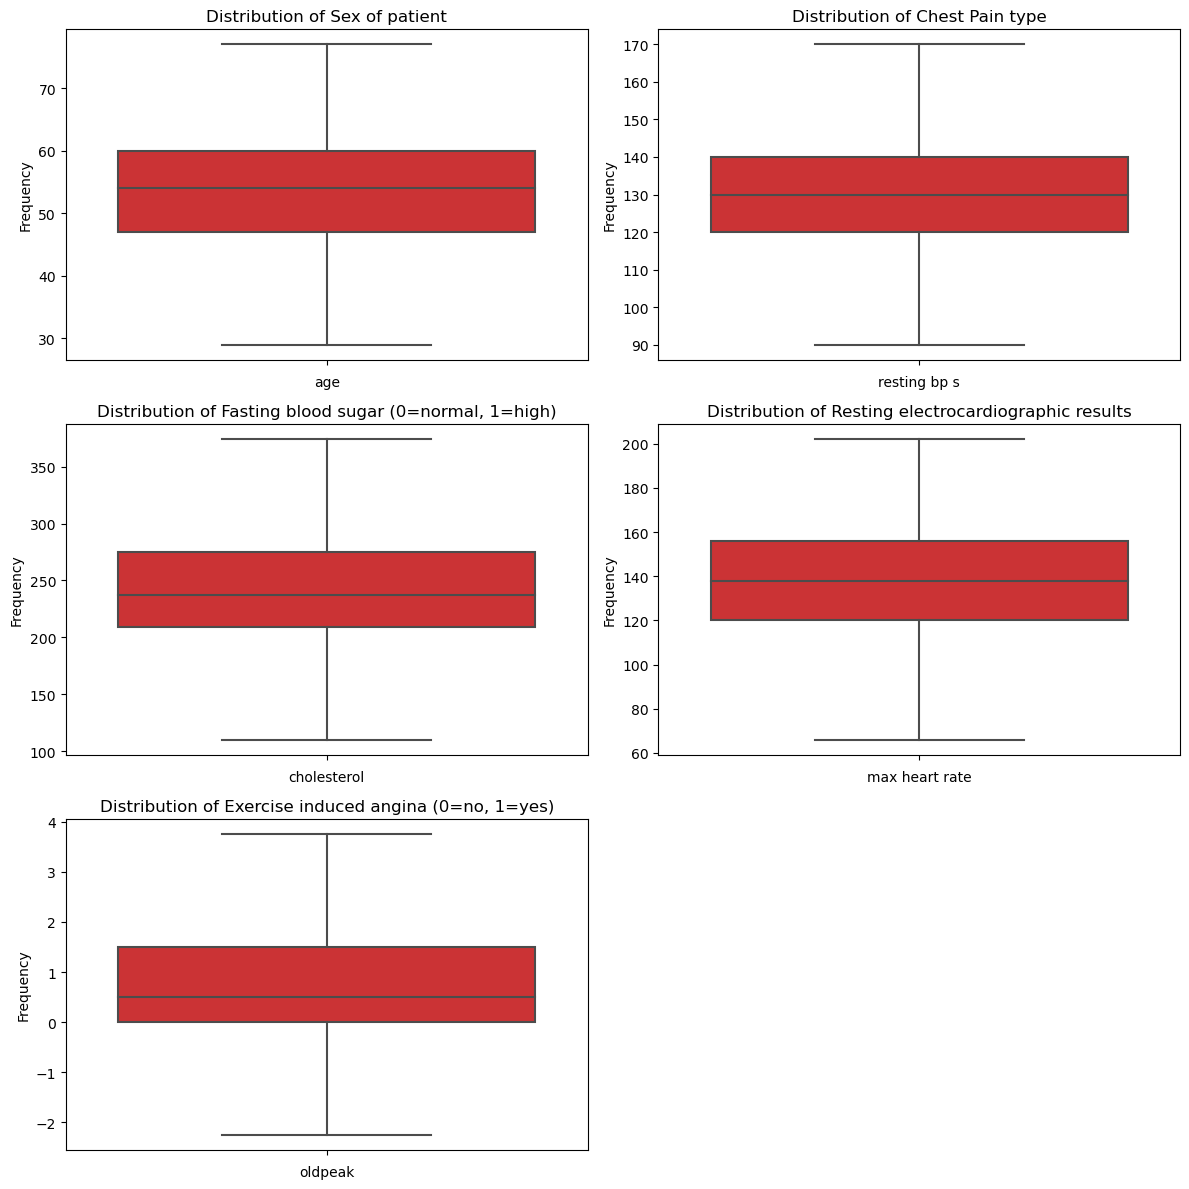

In [42]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12, 12))

axes = axes.flatten()
for i, (column,label) in enumerate(zip(numerical_features,labels)):
    sns.boxplot(data=x_train_cleaned,y=x_train_cleaned[column],ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency') 
    axes[i].set_title(f'Distribution of {label}') 
axes[-1].axis('off')
plt.tight_layout()

In [43]:
# this class we use before but We've encountered a problem when make deploy so we use another technique

class OutlierTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        for col in X.columns:
            q1 = X[col].quantile(0.25)
            q3 = X[col].quantile(0.75)
            iqr = q3 - q1
            low = q1 - (1.5 * iqr)
            high = q3 + (1.5 * iqr)
            X.loc[X[col] < low, col] = low
            X.loc[X[col] > high, col] = high
        return X
    def set_output(self, transform=None):
        return self

In [44]:
from sklearn.preprocessing import FunctionTransformer 
#   lambda X: X.clip(lower=X.quantile(0.25) - 1.5 * (X.quantile(0.75) - X.quantile(0.25)), 
#                                          upper=X.quantile(0.75) + 1.5 * (X.quantile(0.75) - X.quantile(0.25)), axis=1)
def removeOutlier(X):
    for col in X.columns:
        q1 = X[col].quantile(0.25)
        q3 = X[col].quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        X.loc[X[col] < low, col] = low
        X.loc[X[col] > high, col] = high
    return X
outliers_treat=FunctionTransformer()

## **fix skewed distribution**

In [45]:
for col in numerical_features:
    print(f"{col} has skewness = {x_train_cleaned[col].skew()}")

age has skewness = -0.20668650787190865
resting bp s has skewness = 0.2880364188021151
cholesterol has skewness = 0.2909397610145588
max heart rate has skewness = -0.1568173951068305
oldpeak has skewness = 0.8446302329172036


Text(0.5, 1.0, 'before')

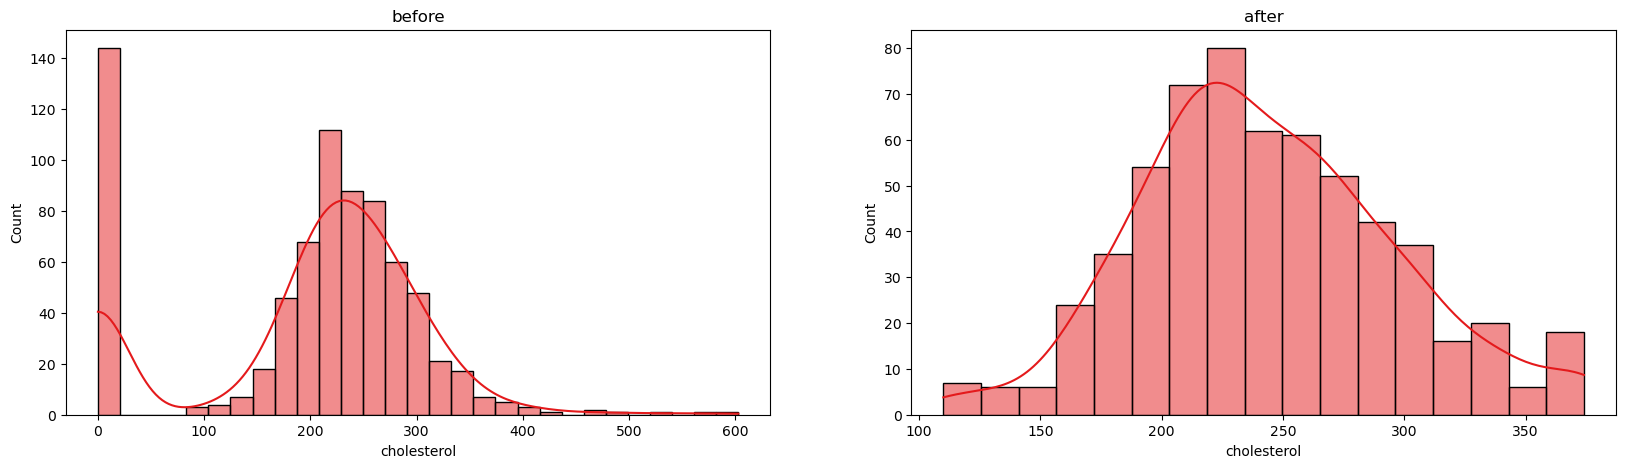

In [46]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axes=axes.flatten()
# x_train_cleaned i make above 
sns.histplot(data=x_train_cleaned,x="cholesterol",ax=axes[1],kde=True)
sns.histplot(data=x_train,x="cholesterol",ax=axes[0],kde=True)
axes[1].set_title(f'after') 
axes[0].set_title(f'before') 


In [47]:
from sklearn.preprocessing import PowerTransformer

In [48]:
power=PowerTransformer()
new_oldpeak=power.fit_transform(x_train[["oldpeak"]])
print(f"After yeo-johnson oldpeak will have skewness  = {pd.Series(new_oldpeak.flatten()).skew()}")


After yeo-johnson oldpeak will have skewness  = -0.31559005450479627


Text(0.5, 0, 'oldpeak')

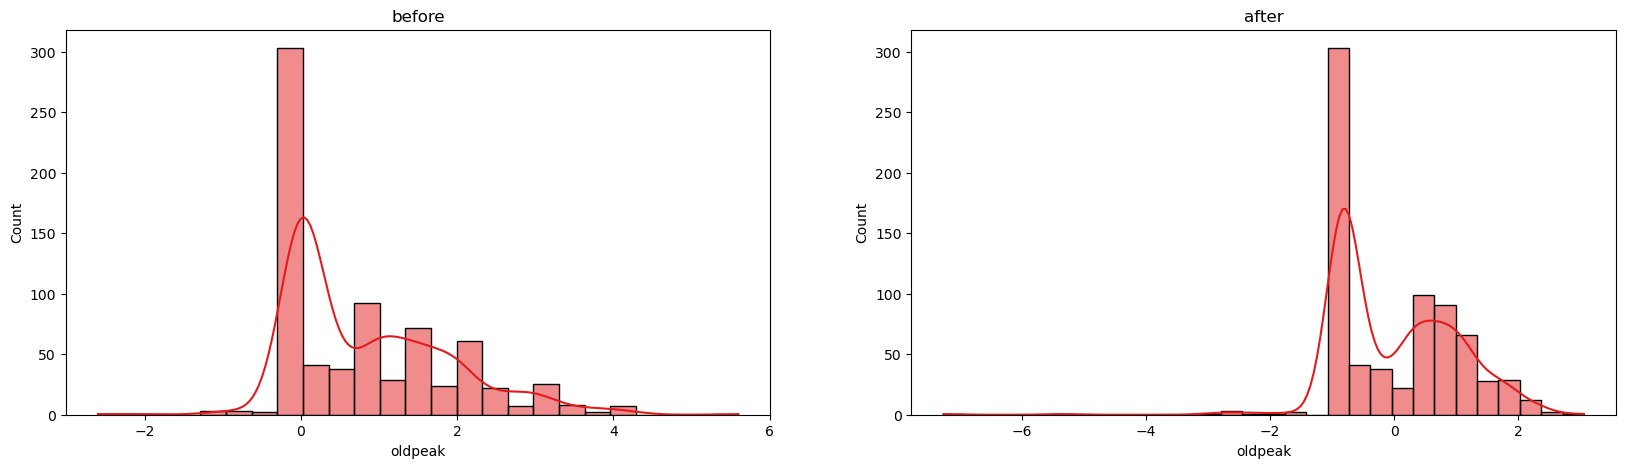

In [49]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axes=axes.flatten()
# x_train_cleaned i make above 
sns.histplot(data=x_train,x="oldpeak",ax=axes[0],kde=True)
sns.histplot(x=new_oldpeak.flatten(),ax=axes[1],kde=True)
axes[1].set_title(f'after') 
axes[0].set_title(f'before') 
axes[1].set_xlabel("oldpeak")

## **Encoding Categorical Features**

In [50]:
categorical_features

['sex',
 'chest pain type',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'ST slope']

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
encoder=OneHotEncoder(sparse=False)

## **Feature Scaling**

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# pipelines

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [55]:
# this pipline without oldpeak
num_pipeline=Pipeline([
    ('num_imputer',num_impute),
    ('outlier_transformer',outliers_treat),
    ('std_scaler',scaler)
]).set_output(transform='pandas')
cholesterol_pipeline=Pipeline([
    ("removeZero",zero_imputer),
    ('num_imputer',num_impute),
    ('outlier_transformer',outliers_treat),
    ('std_scaler',scaler)
]).set_output(transform='pandas')

In [56]:
oldpeak_pipeline=Pipeline([
    ('num_imputer',num_impute),
    ('outlier_transformer',outliers_treat),
    ('power_transformer',power),
    ('std_scaler',scaler)   
]).set_output(transform='pandas')

In [57]:
cat_pipeline=Pipeline([
    ("cat_imputer",cat_impute),
    ("encoder",encoder),
]).set_output(transform='pandas')

In [58]:
full_pipeline=ColumnTransformer([
    ("cholesterol",cholesterol_pipeline,["cholesterol"]),
    ("num",num_pipeline,['age', 'resting bp s', 'cholesterol', 'max heart rate']),
    ("oldpeak",oldpeak_pipeline,["oldpeak"]),
    ("cat",cat_pipeline,categorical_features),
]
).set_output(transform="pandas")

In [59]:
x_train_prepared=full_pipeline.fit_transform(x_train)

In [60]:
x_train_prepared.head()

,cholesterol__cholesterol,num__age,num__resting bp s,num__cholesterol,num__max heart rate,oldpeak__oldpeak,cat__sex_female,cat__sex_male,cat__chest pain type_asymptomatic,cat__chest pain type_atypical angina,...,cat__fasting blood sugar_No,cat__fasting blood sugar_yes,cat__resting ecg_Showing possible hypertrophy,cat__resting ecg_having ST-T wave abnormality,cat__resting ecg_normal,cat__exercise angina_No,cat__exercise angina_yes,cat__ST slope_downsloping,cat__ST slope_flat,cat__ST slope_upsloping
541,0.490716,0.894770,0.300571,0.058118,-0.591253,0.493182,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
62,0.490716,-0.886860,0.408010,0.238742,0.279643,-0.828917,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
591,0.490716,0.999571,0.193131,-0.294097,-0.155805,-0.554589,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
433,0.490716,0.999571,2.019607,-0.185723,-2.095529,1.459218,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
205,0.490716,0.265959,-0.129188,-0.122505,-1.462150,-0.828917,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


# modeling

In [61]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             confusion_matrix,
                             auc
                            )
from sklearn.model_selection import (StratifiedKFold,
                                     cross_val_predict,
                                     cross_val_score,
                                     )

## choose our model

In [62]:
class Classifier:
    def __init__(self, model, X, y):
        self.model = model
        self.X = X
        self.y = y
    def __str__(self):
        return self.model.__class__.__name__
        
    def evaluate(self, scoring_metrics=["accuracy", "f1", "roc_auc"], n_splits=5, n_jobs=-1):
        evaluation_results = []
        for metric in scoring_metrics:
            cv = StratifiedKFold(n_splits=n_splits)
            scores = cross_val_score(self.model, self.X, self.y, cv=cv, scoring=metric, n_jobs=n_jobs)
            evaluation_results.append(scores.mean())
        return evaluation_results
            
        return evaluation_results
    def plot_roc_curve(self):
        if hasattr(self.model, "decision_function"):
            y_scores=cross_val_predict(self.model,self.X,self.y,method="decision_function",n_jobs=-1)
        else:
            y_scores=cross_val_predict(self.model,self.X,self.y,method="predict_proba",n_jobs=-1)[:,1]
        fpr, tpr, _ = roc_curve(self.y,y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title(f'ROC Curve for {self.model.__class__.__name__}')
        plt.legend(loc="lower right")


In [63]:
models=[
    LogisticRegression(random_state=42,max_iter=1000),
    SGDClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
]

In [64]:
scores={"accuracy":[],"f1":[],"roc_auc":[]}
model_objects=[]
for model in models:
    model_clf= Classifier(model, x_train_prepared.values, y_train)
    model_objects.append(model_clf)
    acc, f1, roc_auc = model_clf.evaluate()
    scores["accuracy"].append(acc)
    scores["f1"].append(f1)
    scores["roc_auc"].append(roc_auc)

In [65]:
models_scores= pd.DataFrame(scores,index=["LogisticRegression","SGDClassifier","RandomForestClassifier","DecisionTreeClassifier","SVC","KNeighborsClassifier"])

In [66]:
models_scores

,accuracy,f1,roc_auc
LogisticRegression,0.870597,0.882985,0.928985
SGDClassifier,0.855759,0.869977,0.906698
RandomForestClassifier,0.869264,0.882005,0.925498
DecisionTreeClassifier,0.782977,0.798488,0.781473
SVC,0.877372,0.890524,0.928211
KNeighborsClassifier,0.862534,0.875290,0.906630


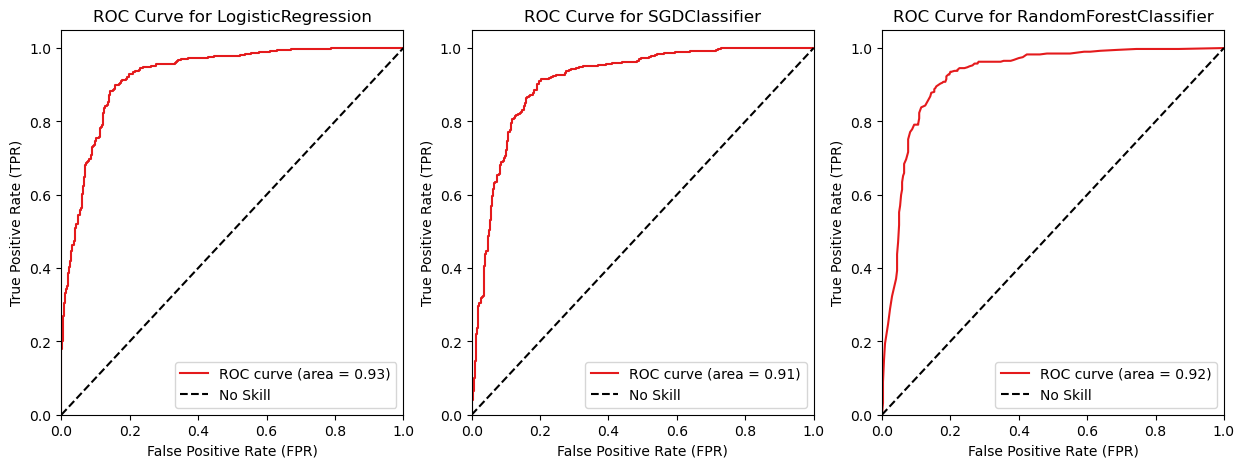

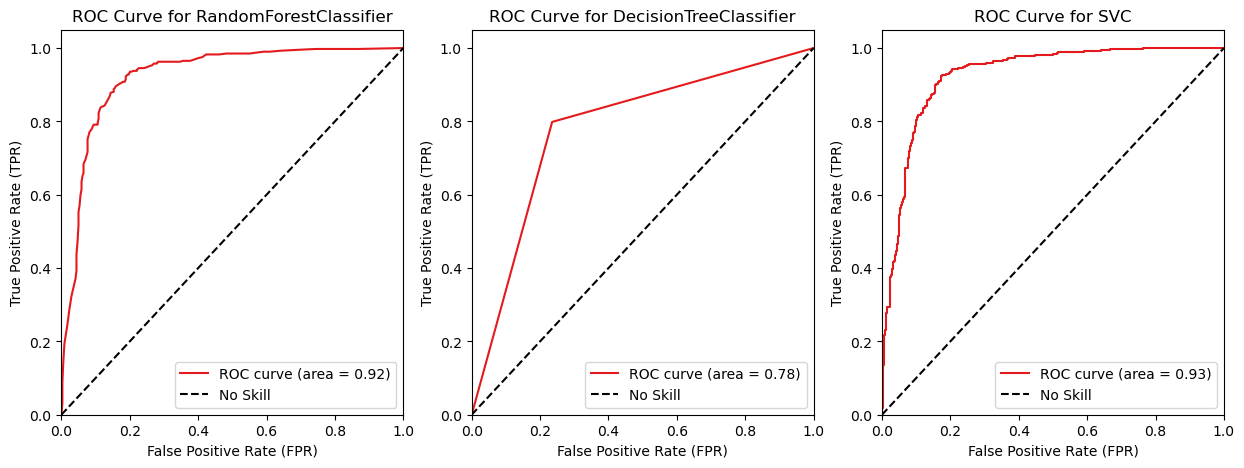

In [67]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in [0,1,2]:
    plt.subplot(1,3,i+1)
    model_objects[i].plot_roc_curve()
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in [0,1,2]:
    plt.subplot(1,3,i+1)
    model_objects[i+2].plot_roc_curve()

## Full pipeline with estimator

In [68]:
full_pipeline_estimator=Pipeline(
    [
        ("preprocessor",full_pipeline),
        ("estimator",SVC(random_state=42))
    ]
).set_output(transform='pandas')

In [69]:
full_pipeline_estimator.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cholesterol',
                                                  Pipeline(steps=[('removeZero',
                                                                   SimpleImputer(fill_value=nan,
                                                                                 missing_values=0,
                                                                                 strategy='constant')),
                                                                  ('num_imputer',
                                                                   KNNImputer()),
                                                                  ('outlier_transformer',
                                                                   FunctionTransformer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['cholesterol']),
                                                 ('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   KNNImpute...
                                                                   FunctionTransformer()),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'chest pain type',
                                                   'fasting blood sugar',
                                                   'resting ecg',
                                                   'exercise angina',
                                                   'ST slope'])])),
                ('estimator', SVC(random_state=42))])

In [70]:
train_score = full_pipeline_estimator.score(x_train, y_train)
test_score = full_pipeline_estimator.score(x_test, y_test)

print(f"Train  Score: {train_score:.3f}")
print(f"Test  Score: {test_score:.3f}")

Train  Score: 0.910
Test  Score: 0.860


## validation curves

In [71]:
from sklearn.model_selection import validation_curve

param_range_c =[ 0.01, 0.1, 1, 10,20,100,200,1000]
train_scores_c, validate_scores_c = validation_curve(
    full_pipeline_estimator, x_train, y_train, param_name="estimator__C", param_range=param_range_c,
    scoring="accuracy", cv=5
)

In [72]:
train_scores_mean_c = np.mean(train_scores_c, axis=1)
val_scores_mean_c = np.mean(validate_scores_c, axis=1)

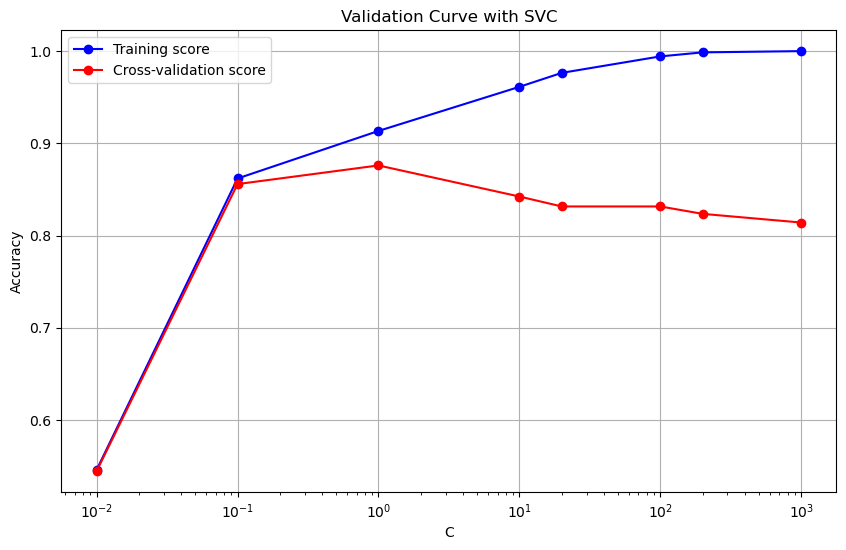

In [73]:
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with SVC")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.semilogx(param_range_c, train_scores_mean_c, label="Training score", color="blue", marker="o")

plt.semilogx(param_range_c, val_scores_mean_c, label="Cross-validation score", color="red", marker="o")

plt.legend(loc="best")
plt.grid(True)
plt.show()


In [74]:
param_range_gamma =[ 0.01, 0.1, 1, 10,20,100,200,1000]
train_scores_gamma, validate_scores_gamma = validation_curve(
    full_pipeline_estimator, x_train, y_train, param_name="estimator__gamma", param_range=param_range_gamma,
    scoring="accuracy", cv=5
)

In [75]:
train_scores_mean_gamma = np.mean(train_scores_gamma, axis=1)
val_scores_mean_gamma = np.mean(validate_scores_gamma, axis=1)

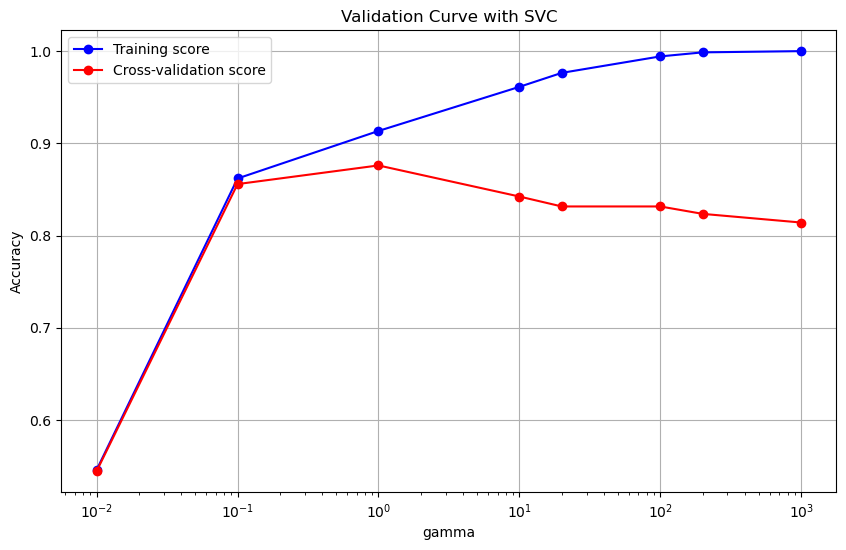

In [76]:
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with SVC")
plt.xlabel("gamma")
plt.ylabel("Accuracy")
plt.semilogx(param_range_c, train_scores_mean_c, label="Training score", color="blue", marker="o")

plt.semilogx(param_range_c, val_scores_mean_c, label="Cross-validation score", color="red", marker="o")

plt.legend(loc="best")
plt.grid(True)
plt.show()


In [77]:
param_range_degree =[ 0,1,2,3,4,5,6]
train_scores_degree, validate_scores_degree = validation_curve(
    full_pipeline_estimator.set_params(estimator__kernel="poly"), x_train, y_train, param_name="estimator__degree", param_range=param_range_degree,
    scoring="accuracy", cv=5
)

In [78]:
train_scores_mean_degree = np.mean(train_scores_degree, axis=1)
val_scores_mean_degree = np.mean(validate_scores_degree, axis=1)

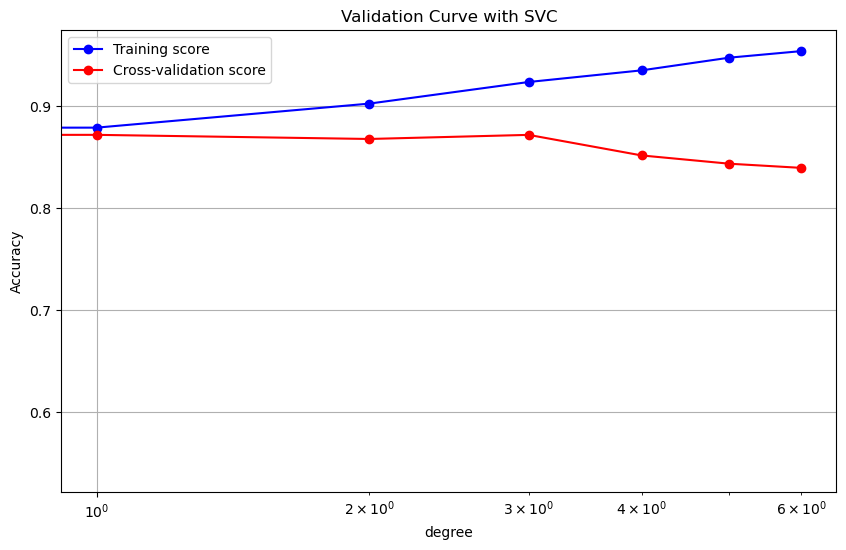

In [79]:
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with SVC")
plt.xlabel("degree")
plt.ylabel("Accuracy")
plt.semilogx(param_range_degree, train_scores_mean_degree, label="Training score", color="blue", marker="o")

plt.semilogx(param_range_degree, val_scores_mean_degree, label="Cross-validation score", color="red", marker="o")

plt.legend(loc="best")
plt.grid(True)
plt.show()


In [80]:
param_range_coef = np.logspace(-4, 2, num=20)  # Using a logarithmic scale
train_scores_coef, validate_scores_coef = validation_curve(
    full_pipeline_estimator.set_params(estimator__kernel="poly"), x_train, y_train, param_name="estimator__coef0", param_range=param_range_coef,
    scoring="accuracy", cv=5
)

In [81]:
train_scores_mean_coef = np.mean(train_scores_coef, axis=1)
val_scores_mean_coef = np.mean(validate_scores_coef, axis=1)

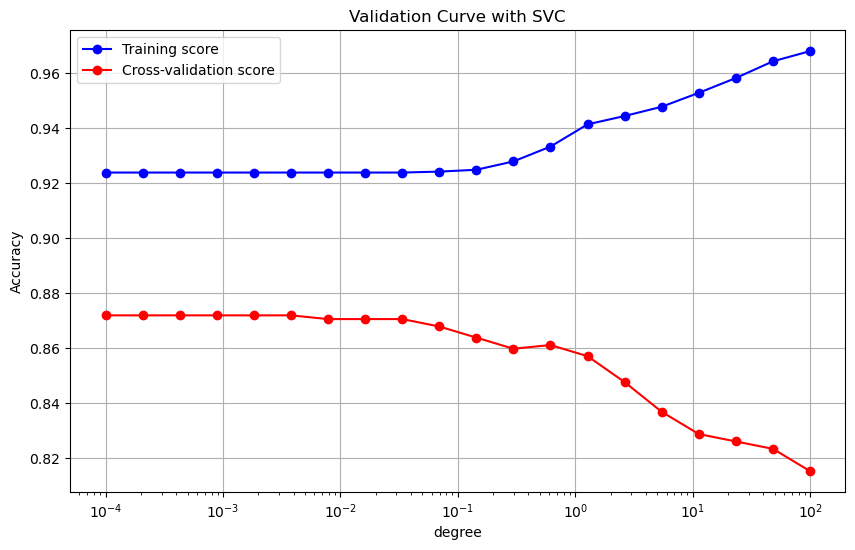

In [82]:
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with SVC")
plt.xlabel("degree")
plt.ylabel("Accuracy")
plt.semilogx(param_range_coef, train_scores_mean_coef, label="Training score", color="blue", marker="o")

plt.semilogx(param_range_coef, val_scores_mean_coef, label="Cross-validation score", color="red", marker="o")

plt.legend(loc="best")
plt.grid(True)
plt.show()

## Hyperparameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'estimator__degree': [1,2,3,4,5],
    'estimator__C': [5,7,8,9,10,11,12,13,14,20],
    'estimator__kernel': ['poly','rbf'],
    'estimator__gamma':[0.001,0.01,0.1,1,3],
    'estimator__coef0': np.logspace(-2, 1, num=5) 
}

In [84]:
grid_search = GridSearchCV(estimator=full_pipeline_estimator, param_grid=param_grid, cv=5,scoring="accuracy", n_jobs=-1,return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cholesterol',
                                                                         Pipeline(steps=[('removeZero',
                                                                                          SimpleImputer(fill_value=nan,
                                                                                                        missing_values=0,
                                                                                                        strategy='constant')),
                                                                                         ('num_imputer',
                                                                                          KNNImputer()),
                                                                                         ('outlier_transformer',
                                                                                          FunctionTransformer()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['cholesterol']),
                                                                        ('num',
                                                                         Pipeline(ste...
                                                                          'slope'])])),
                                       ('estimator',
                                        SVC(kernel='poly', random_state=42))]),
             n_jobs=-1,
             param_grid={'estimator__C': [5, 7, 8, 9, 10, 11, 12, 13, 14, 20],
                         'estimator__coef0': array([ 0.01      ,  0.05623413,  0.31622777,  1.77827941, 10.        ]),
                         'estimator__degree': [1, 2, 3, 4, 5],
                         'estimator__gamma': [0.001, 0.01, 0.1, 1, 3],
                         'estimator__kernel': ['poly', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [85]:
grid_search.best_params_

{'estimator__C': 13,
 'estimator__coef0': 1.7782794100389228,
 'estimator__degree': 3,
 'estimator__gamma': 0.01,
 'estimator__kernel': 'poly'}

In [86]:
full_pipeline_best_estimator=grid_search.best_estimator_
train_pred=full_pipeline_best_estimator.predict(x_train)

Text(0.5, 58.7222222222222, 'Ground Truth')

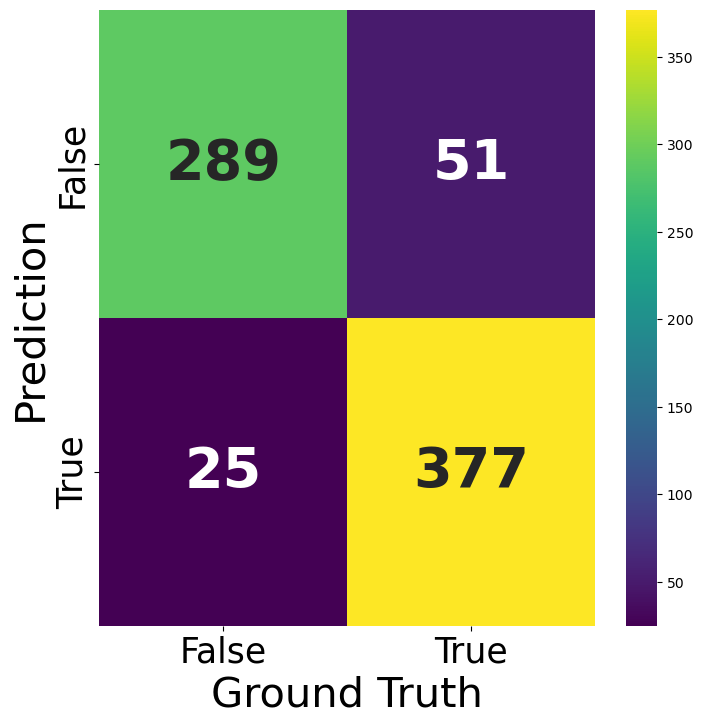

In [87]:
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_train, train_pred), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels, fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       340
           1       0.88      0.94      0.91       402

    accuracy                           0.90       742
   macro avg       0.90      0.89      0.90       742
weighted avg       0.90      0.90      0.90       742



In [89]:
best_clf=Classifier(full_pipeline_best_estimator.named_steps["estimator"],x_train_prepared,y_train)

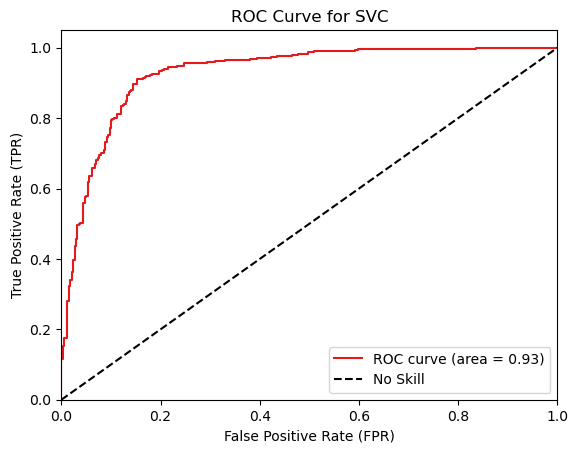

In [90]:
best_clf.plot_roc_curve()

## learning curve

CPU times: total: 359 ms
Wall time: 1.31 s


Text(0.5, 1.0, 'Learning Curve for SVC')

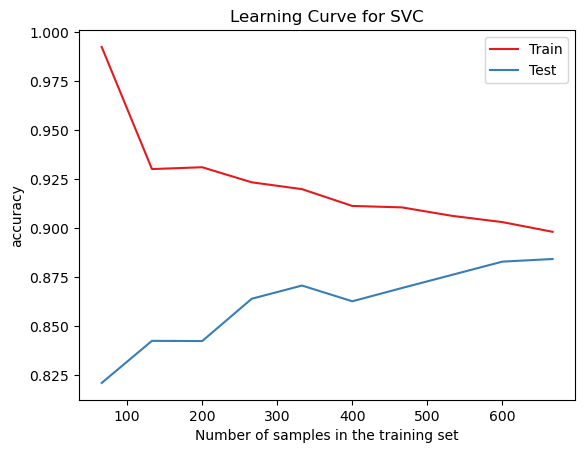

In [91]:
%%time
from sklearn.model_selection import LearningCurveDisplay

train_sizes = np.linspace(0.1, 1.0, num=10) 

# Create a LearningCurveDisplay
display = LearningCurveDisplay.from_estimator(

    grid_search.best_estimator_,
    x_train,
    y_train,
    train_sizes=train_sizes,
    cv=10,
    score_type="both",  # both train and validate errors
    scoring = "accuracy",
    score_name="accuracy",
    n_jobs=-1,
    std_display_style=None
        
)
display.ax_.set_title("Learning Curve for SVC")

## check accuracy on test set

In [92]:
y_pred=grid_search.predict(x_test)

Text(0.5, 58.7222222222222, 'Ground Truth')

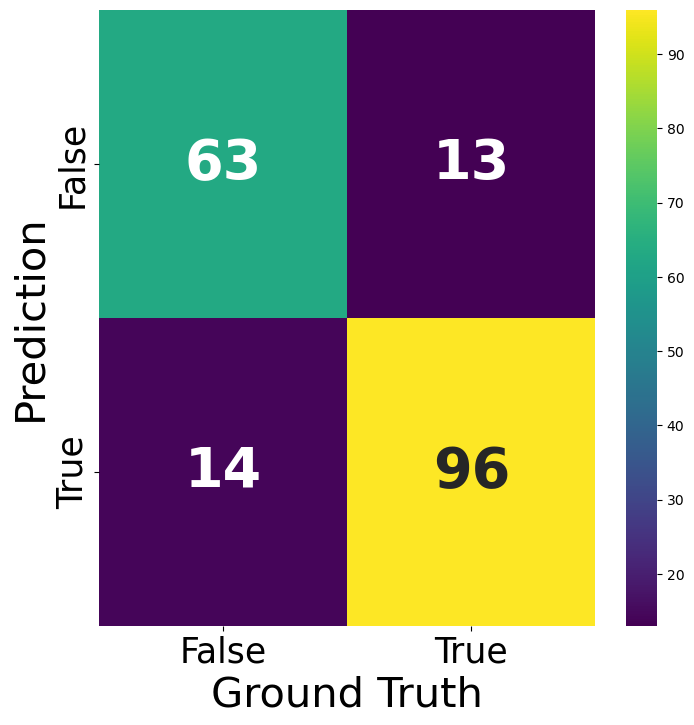

In [93]:
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels, fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        76
           1       0.88      0.87      0.88       110

    accuracy                           0.85       186
   macro avg       0.85      0.85      0.85       186
weighted avg       0.86      0.85      0.85       186



In [95]:
import joblib
try:    
    print("Saving pipeline!")
    pipeline_filename = 'models/heart_pipeline.pkl'
    joblib.dump(grid_search.best_estimator_, pipeline_filename);
    print("Pipeline saved successfully!")
    
except Exception as err:
    print(f"Unexpected {err}, {type(err)}")

Saving pipeline!
Pipeline saved successfully!
